<h1> Validate libNEST for S1S2 for LZ, comparing to rootNEST ouput</h1>

In [1]:
from __future__ import division
import sys
home_dir=!echo "$HOME"
sys.path.insert(2,home_dir[0]+'/iPyNb/NERSC_Import') 
from pyNEST import *
import pandas as pd
import scipy.interpolate as ip
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # set size of figures"
plt.rcParams.update({'font.size': 18})

Populating the interactive namespace from numpy and matplotlib


<h1> Load LZ yields generated with rootNEST</h1>

In [2]:
rN_LZ_ER=loadtxt('data_yields/LZ_rootNEST_flat_ER.txt',skiprows=1).T
rN_LZ_NR=loadtxt('data_yields/LZ_rootNEST_flat_NR.txt',skiprows=1).T

<h1> Calculate S2 S1 for LZ detector </h1>

In [3]:
NEST=libNEST.NEST(0,10,700,2.888,-1) # 0 is NR, 1 is ER ... Energy, EField(V/cm), density, drift location
myDet=libNEST.Detector()
myDet.LZSettings()
NEST.SetDetectorParameters(myDet)
#NEST.SetDriftLocation(380)
S1c_nr=[]
S2c_nr=[]
Energy = linspace(1,50,100)

for En in Energy:
    NEST.SetEnergy(En)
    for ii in arange(0,1000,1):
        NEST.DetectorResponse()
        S1c_nr.append(NEST.GetS1c())
        S2c_nr.append(NEST.GetS2c())
S1c_nr=np.array(S1c_nr)
S2c_nr=np.array(S2c_nr)

#calculate NR band of the SIM
cut=(S1c_nr>0) & (S2c_nr>0)
S1c_nr=S1c_nr[cut]
S2c_nr=S2c_nr[cut]*250/450
s2s1_sim_nr=log10(S2c_nr/S1c_nr)

S2S1_nr_mean=[]
S2S1_nr_sig=[]

S1_nr_cen=np.arange(1.5,80.5,1)
for s1_bins in S1_nr_cen:
    S2S1_nr_mean.append(mean(s2s1_sim_nr[(S1c_nr>(s1_bins-0.5))&(S1c_nr<(s1_bins+0.5))]))
    S2S1_nr_sig.append(std(s2s1_sim_nr[(S1c_nr>(s1_bins-0.5))&(S1c_nr<(s1_bins+0.5))]))
S2S1_nr_mean=np.array(S2S1_nr_mean)
S2S1_nr_sig=np.array(S2S1_nr_sig)

################################################################################
#NEST=libNEST.NEST(1,10,700,2.888,500) # 0 is NR, 1 is ER ... Energy, EField(V/cm), density
#myDet=libNEST.Detector()
#myDet.LZSettings()
#NEST.SetDetectorParameters(myDet)
NEST.SetParticleType(1) #ER

S1c_er=[]
S2c_er=[]
Energy = linspace(1,50,100)

for En in Energy:
    NEST.SetEnergy(En)
    for ii in arange(0,1000,1):
        NEST.DetectorResponse()
        S1c_er.append(NEST.GetS1c())
        S2c_er.append(NEST.GetS2c())
S1c_er=np.array(S1c_er)
S2c_er=np.array(S2c_er)


#calculate ER band of the SIM
cut=(S1c_er>0) & (S2c_er>0)
S1c_er=S1c_er[cut]
S2c_er=S2c_er[cut]*250/450
s2s1_sim_er=log10(S2c_er/S1c_er)

S2S1_er_mean=[]
S2S1_er_sig=[]

S1_er_cen=np.arange(1.5,80.5,1)
for s1_bins in S1_er_cen:
    S2S1_er_mean.append(mean(s2s1_sim_er[(S1c_er>(s1_bins-0.5))&(S1c_er<(s1_bins+0.5))]))
    S2S1_er_sig.append(std(s2s1_sim_er[(S1c_er>(s1_bins-0.5))&(S1c_er<(s1_bins+0.5))]))
S2S1_er_mean=np.array(S2S1_er_mean)
S2S1_er_sig=np.array(S2S1_er_sig)

//anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
//anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:83: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


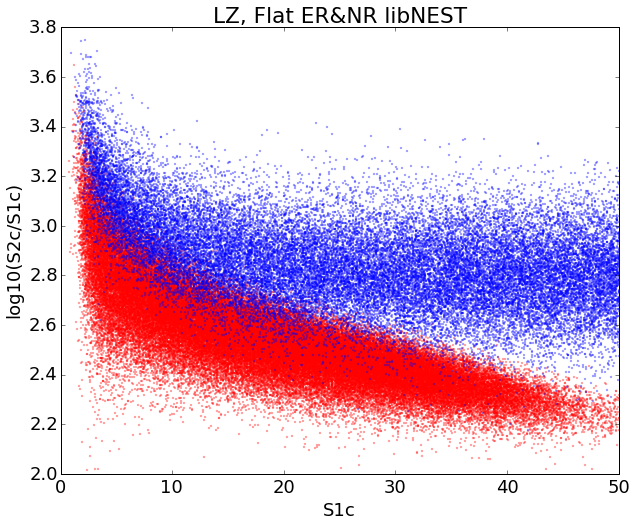

In [4]:
plt.scatter(S1c_nr,log10(S2c_nr/S1c_nr),alpha=0.3,color='red',s=2)
plt.scatter(S1c_er,log10(S2c_er/S1c_er),alpha=0.3,color='blue',s=2)
xlabel('S1c')
ylabel('log10(S2c/S1c)')
ylim([2,3.8])
xlim([0,50])
plt.title('LZ, Flat ER&NR libNEST')
plt.savefig('val_figs/LZ_ER-NR_flat_val.png')

<h1> Compare rootNEST bands to libNEST bands </h1>

In [22]:
S1c_er_rn=rN_LZ_ER[4]
S2c_er_rn=rN_LZ_ER[6]
S1c_nr_rn=rN_LZ_NR[4]
S2c_nr_rn=rN_LZ_NR[6]

#calculate NR band of the SIM
cut=(S1c_nr_rn>0) & (S2c_nr_rn>0)
S1c_nr_rn=S1c_nr_rn[cut]
S2c_nr_rn=S2c_nr_rn[cut]
s2s1_sim_nr_rn=log10(S2c_nr_rn/S1c_nr_rn)

S2S1_nr_mean_rn=[]
S2S1_nr_sig_rn=[]

S1_nr_cen_rn=np.arange(1.5,80.5,1)
for s1_bins in S1_nr_cen_rn:
    S2S1_nr_mean_rn.append(mean(s2s1_sim_nr_rn[(S1c_nr_rn>(s1_bins-0.5))&(S1c_nr_rn<(s1_bins+0.5))]))
    S2S1_nr_sig_rn.append(std(s2s1_sim_nr_rn[(S1c_nr_rn>(s1_bins-0.5))&(S1c_nr_rn<(s1_bins+0.5))]))
S2S1_nr_mean_rn=np.array(S2S1_nr_mean_rn)
S2S1_nr_sig_rn=np.array(S2S1_nr_sig_rn)

#calculate ER band of the SIM
cut=(S1c_er_rn>0) & (S2c_er_rn>0)
S1c_er_rn=S1c_er_rn[cut]
S2c_er_rn=S2c_er_rn[cut]
s2s1_sim_er_rn=log10(S2c_er_rn/S1c_er_rn)

S2S1_er_mean_rn=[]
S2S1_er_sig_rn=[]

S1_er_cen_rn=np.arange(1.5,80.5,1)
for s1_bins in S1_er_cen_rn:
    S2S1_er_mean_rn.append(mean(s2s1_sim_er_rn[(S1c_er_rn>(s1_bins-0.5))&(S1c_er_rn<(s1_bins+0.5))]))
    S2S1_er_sig_rn.append(std(s2s1_sim_er_rn[(S1c_er_rn>(s1_bins-0.5))&(S1c_er_rn<(s1_bins+0.5))]))
S2S1_er_mean_rn=np.array(S2S1_er_mean_rn)
S2S1_er_sig_rn=np.array(S2S1_er_sig_rn)

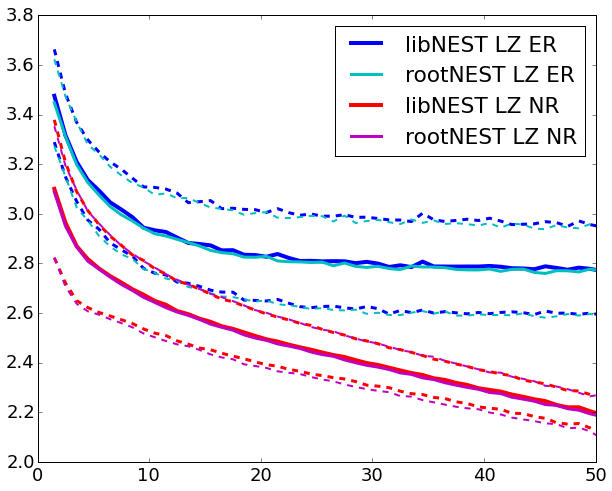

In [23]:
#plot SIM fit ER
ax2=plt.plot(S1_er_cen,S2S1_er_mean,'-b',linewidth=4,label='libNEST LZ ER')
plt.plot(S1_er_cen,S2S1_er_mean-1.28*S2S1_er_sig,'--b',linewidth=3)
plt.plot(S1_er_cen,S2S1_er_mean+1.28*S2S1_er_sig,'--b',linewidth=3)

#plot rootNEST SIM fit NR
ax2=plt.plot(S1_er_cen_rn,S2S1_er_mean_rn,'-c',linewidth=3,label='rootNEST LZ ER')
plt.plot(S1_er_cen_rn,S2S1_er_mean_rn-1.28*S2S1_er_sig_rn,'--c',linewidth=2)
plt.plot(S1_er_cen_rn,S2S1_er_mean_rn+1.28*S2S1_er_sig_rn,'--c',linewidth=2)

#plot SIM fit NR
ax2=plt.plot(S1_nr_cen,S2S1_nr_mean,'-r',linewidth=4,label='libNEST LZ NR')
plt.plot(S1_nr_cen,S2S1_nr_mean-1.28*S2S1_nr_sig,'--r',linewidth=3)
plt.plot(S1_nr_cen,S2S1_nr_mean+1.28*S2S1_nr_sig,'--r',linewidth=3)


#plot rootNEST SIM fit NR
ax2=plt.plot(S1_nr_cen_rn,S2S1_nr_mean_rn,'-m',linewidth=3,label='rootNEST LZ NR')
plt.plot(S1_nr_cen_rn,S2S1_nr_mean_rn-1.28*S2S1_nr_sig_rn,'--m',linewidth=2)
plt.plot(S1_nr_cen_rn,S2S1_nr_mean_rn+1.28*S2S1_nr_sig_rn,'--m',linewidth=2)

plt.legend()

ylim([2, 3.8])
xlim([0,50])

plt.savefig('val_figs/LZ_Det_ERNR_val.png')